In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from scipy.io import wavfile
from scipy.fftpack import fft
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as dis
import re
import gzip
import tarfile
import os

In [3]:
a = os.listdir('drive/My Drive/speech')
print(', '.join(a))

four, forward, off, five, on, six, down, house, two, visual, up, zero, three, stop, follow, happy, backward, learn, cat, right, eight, sheila, nine, yes, one, no, left, tree, bed, bird, go, wow, seven, marvin, dog, background_noise


In [0]:
path = 'drive/My Drive/speech/'
yes = pd.DataFrame({'file':listdir(path +'yes'), 'target':['yes' for x in range(len(listdir(path +'yes')))]})
background_noise = pd.DataFrame({'file':listdir(path +'background_noise'), 'target':['background_noise' for x in range(len(listdir(path +'background_noise')))]})
no = pd.DataFrame({'file':listdir(path +'no'), 'target':['no' for x in range(len(listdir(path +'no')))]})
backward = pd.DataFrame({'file':listdir(path +'backward'), 'target':['backward' for x in range(len(listdir(path +'backward')))]})
bed = pd.DataFrame({'file':listdir(path +'bed'), 'target':['bed' for x in range(len(listdir(path +'bed')))]})
bird = pd.DataFrame({'file':listdir(path +'bird'), 'target':['bird' for x in range(len(listdir(path +'bird')))]})
cat = pd.DataFrame({'file':listdir(path +'cat'), 'target':['cat' for x in range(len(listdir(path +'cat')))]})
dog = pd.DataFrame({'file':listdir(path +'dog'), 'target':['dog' for x in range(len(listdir(path +'dog')))]})
down = pd.DataFrame({'file':listdir(path +'down'), 'target':['down' for x in range(len(listdir(path +'down')))]})
eight = pd.DataFrame({'file':listdir(path +'eight'), 'target':['eight' for x in range(len(listdir(path +'eight')))]})
five = pd.DataFrame({'file':listdir(path +'five'), 'target':['five' for x in range(len(listdir(path +'five')))]})
follow = pd.DataFrame({'file':listdir(path +'follow'), 'target':['follow' for x in range(len(listdir(path +'follow')))]})
forward = pd.DataFrame({'file':listdir(path +'forward'), 'target':['forward' for x in range(len(listdir(path +'forward')))]})
four = pd.DataFrame({'file':listdir(path +'four'), 'target':['four' for x in range(len(listdir(path +'four')))]})
go = pd.DataFrame({'file':listdir(path +'go'), 'target':['go' for x in range(len(listdir(path +'go')))]})
happy = pd.DataFrame({'file':listdir(path +'happy'), 'target':['happy' for x in range(len(listdir(path +'happy')))]})
house = pd.DataFrame({'file':listdir(path +'house'), 'target':['house' for x in range(len(listdir(path +'house')))]})
learn = pd.DataFrame({'file':listdir(path +'learn'), 'target':['learn' for x in range(len(listdir(path +'learn')))]})
left = pd.DataFrame({'file':listdir(path +'left'), 'target':['left' for x in range(len(listdir(path +'left')))]})
marvin = pd.DataFrame({'file':listdir(path +'marvin'), 'target':['marvin' for x in range(len(listdir(path +'marvin')))]})
nine = pd.DataFrame({'file':listdir(path +'nine'), 'target':['nine' for x in range(len(listdir(path +'nine')))]})
off = pd.DataFrame({'file':listdir(path +'off'), 'target':['off' for x in range(len(listdir(path +'off')))]})
on = pd.DataFrame({'file':listdir(path +'on'), 'target':['on' for x in range(len(listdir(path +'on')))]})
one = pd.DataFrame({'file':listdir(path +'one'), 'target':['one' for x in range(len(listdir(path +'one')))]})
right = pd.DataFrame({'file':listdir(path +'right'), 'target':['right' for x in range(len(listdir(path +'right')))]})
seven = pd.DataFrame({'file':listdir(path +'seven'), 'target':['seven' for x in range(len(listdir(path +'seven')))]})
sheila = pd.DataFrame({'file':listdir(path +'sheila'), 'target':['sheila' for x in range(len(listdir(path +'sheila')))]})
six = pd.DataFrame({'file':listdir(path +'six'), 'target':['six' for x in range(len(listdir(path +'six')))]})
stop = pd.DataFrame({'file':listdir(path +'stop'), 'target':['stop' for x in range(len(listdir(path +'stop')))]})
three = pd.DataFrame({'file':listdir(path +'three'), 'target':['three' for x in range(len(listdir(path +'three')))]})
tree = pd.DataFrame({'file':listdir(path +'tree'), 'target':['tree' for x in range(len(listdir(path +'tree')))]})
two = pd.DataFrame({'file':listdir(path +'two'), 'target':['two' for x in range(len(listdir(path +'two')))]})
up = pd.DataFrame({'file':listdir(path +'up'), 'target':['up' for x in range(len(listdir(path +'up')))]})
visual = pd.DataFrame({'file':listdir(path +'visual'), 'target':['visual' for x in range(len(listdir(path +'visual')))]})
wow = pd.DataFrame({'file':listdir(path +'wow'), 'target':['wow' for x in range(len(listdir(path +'wow')))]})
zero = pd.DataFrame({'file':listdir(path +'zero'), 'target':['zero' for x in range(len(listdir(path +'zero')))]})

In [0]:
label = pd.concat([background_noise, backward, bed, bird, cat, dog, down, eight, five, follow, forward, four, go, happy, 
                   house, learn, left, marvin, nine, no, off, on, one, right, seven, sheila, six, stop, three, tree, 
                   two, up, visual, wow, yes, zero],ignore_index=True)

In [28]:
label.head()

,file,target
0,running_tap.wav,background_noise
1,doing_the_dishes.wav,background_noise
2,white_noise.wav,background_noise
3,dude_miaowing.wav,background_noise
4,exercise_bike.wav,background_noise


In [0]:
import librosa
import librosa.display
import os
import scipy.signal as sps
import IPython.display as ipd
import time

### Hyperparameter Tuning

##### 1. res_type='kaiser_fast'

In [137]:
start = time.clock()
samples, sample_rate = librosa.load('drive/My Drive/speech/one/98ea0818_nohash_5.wav',res_type='kaiser_fast')
print('Run time: ',time.clock()-start, 's')
print('Frequency: ', sample_rate, 'Hz')
ipd.Audio(samples, rate=sample_rate)

Run time:  0.03441300000000069 s
Frequency:  22050 Hz


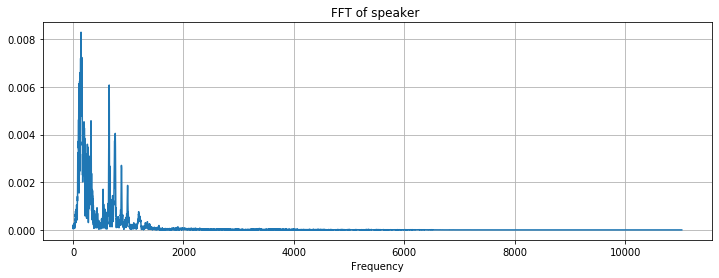

In [138]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

def plot_fft():
  xf, vals = custom_fft(samples, sample_rate)
  plt.figure(figsize=(12, 4))
  plt.title('FFT of speaker ')
  plt.plot(xf, vals)
  plt.xlabel('Frequency')
  plt.grid()
  plt.show()

plot_fft()

##### 2. sr= 8000 Hz

In [139]:
start = time.clock()
samples, sample_rate = librosa.load('drive/My Drive/speech/one/98ea0818_nohash_5.wav',sr=8000)
print('Run time: ',time.clock()-start, 's')
print('Frequency: ', sample_rate, 'Hz')
ipd.Audio(samples, rate=sample_rate)

Run time:  0.04560499999999479 s
Frequency:  8000 Hz


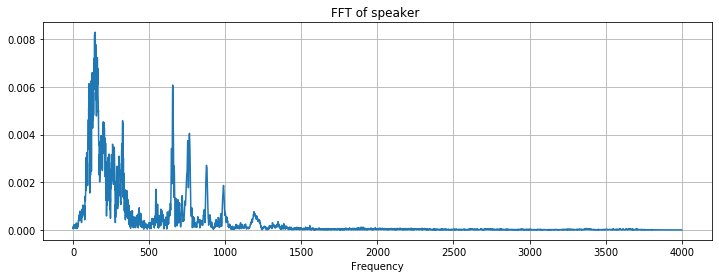

In [140]:
plot_fft()

##### 3. sr= 8000 Hz

In [141]:
start = time.clock()
samples, sample_rate = librosa.load('drive/My Drive/speech/one/98ea0818_nohash_5.wav',sr=3000)
print('Run time: ',time.clock()-start, 's')
print('Frequency: ', sample_rate, 'Hz')
ipd.Audio(samples, rate=sample_rate)

Run time:  0.04749400000000037 s
Frequency:  3000 Hz


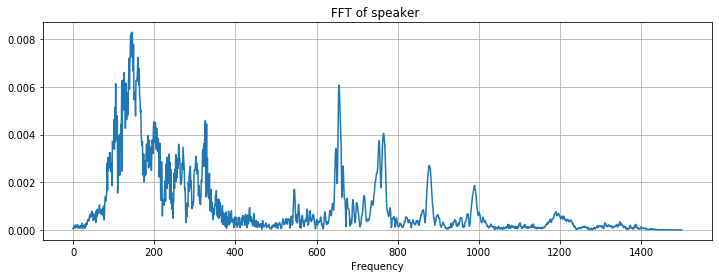

In [143]:
plot_fft()

### Feature Extraction

In [0]:
%time
audio_path = 'drive/My Drive/speech/'

all_wave = []
all_label = []
for label in os.listdir(audio_path):
  print(label)
  waves = [f for f in os.listdir(audio_path+label)if f.endswith('.wav')]
  for wav in waves:
    samples, sample_rate = librosa.load(audio_path + label + '/'+wav, sr = 3000)
    if(len(samples)== 3000) :
      all_wave.append(samples)
      all_label.append(label)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [0]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(os.listdir(audio_path)))

In [106]:
np.array(y)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [107]:
np.array(all_wave)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.60360791e-04,  1.26189366e-03,  3.87572404e-03],
       [-1.09526074e-04, -1.99797039e-04, -3.42421059e-04, ...,
        -2.09695689e-04, -1.11890942e-04, -3.45802429e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.73805945e-05,  1.18948512e-04, -2.58800341e-04],
       ...,
       [ 1.31150839e-04,  2.54115352e-04, -1.93009881e-04, ...,
        -1.92649395e-03, -1.59093377e-03, -9.61588754e-04],
       [-6.19745988e-05, -1.11645153e-04, -1.71476218e-04, ...,
         1.59229198e-03,  1.06138340e-03,  1.14922924e-03],
       [ 4.16084687e-04, -1.25286891e-03,  3.32259486e-04, ...,
         4.83434461e-03, -4.16925672e-04, -3.36322957e-03]], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x, y_train, y = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.4,random_state=1,shuffle=True)

In [0]:
x_val, x_test, y_val, y_test = train_test_split(x,y,test_size = 0.5,random_state=1,shuffle=True)

In [110]:
print('Validation: ',x_val.shape,y_val.shape)
print('Test: ',x_test.shape,y_test.shape)

Validation:  (261, 3000) (261, 36)
Test:  (261, 3000) (261, 36)
